In [ ]:
from nbodykit.lab import *
import pandas as pd
import numpy as np

zmin, zmax = 0.05, 0.15

# Load your data and randoms as Pandas DataFrames
sdss = pd.read_csv('../data/sdss_zmin_0.000_zmax_0.300_sigma_5.0.csv')
sdss  = sdss[(sdss["red"] > zmin)&(sdss["red"] < zmax)]
randoms = pd.read_csv('../data/random_sample_healpy_128_910159.csv')  # Replace with your randoms CSV file path

# Convert DataFrames to ArrayCatalog with RA, DEC, and Redshift
data_cat = ArrayCatalog({'RA': sdss['ra'].values,
                         'DEC': sdss['dec'].values,
                         'Redshift': sdss['red'].values})

rand_cat = ArrayCatalog({'RA': randoms['ra'].values,
                         'DEC': randoms['dec'].values,
                         'Redshift': randoms['red'].values})


#data_cat['RA'] = np.radians(data_cat['RA'])
#data_cat['DEC'] = np.radians(data_cat['DEC'])
#rand_cat['RA'] = np.radians(rand_cat['RA'])
#rand_cat['DEC'] = np.radians(rand_cat['DEC'])

# Assign cosmology (if not already in the data)
cosmo = cosmology.Planck15

# Define the edges for s and mu bins
s_bins = np.linspace(50,150,30)  # smaller range for simplicity
mu_bins = len(s_bins)-1  # fewer bins for testing

# Define the SurveyData2PCF object
result = SurveyData2PCF('2d', data_cat, rand_cat, edges=s_bins, Nmu=mu_bins, cosmo=cosmo, ra='RA', dec='DEC', redshift='Redshift')

# Access the computed correlation function
xi_s_mu = result.corr.data  # 2D correlation function values
s = result.corr.coords['r']  # The s bins
mu = result.corr.coords['mu']  # The mu bins

# Save or print results
print("s:", s)
print("mu:", mu)
print("xi(s, mu):", xi_s_mu)

# Optionally save the results to a file
np.savez('xi_s_mu_results.npz', s=s, mu=mu, xi_s_mu=xi_s_mu)



### ChatGPT

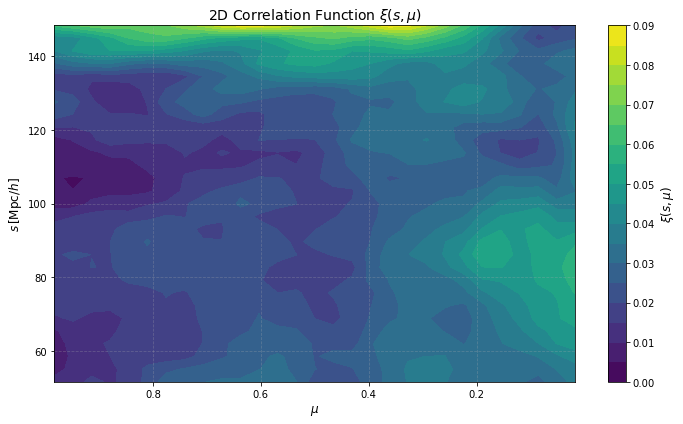

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

# Load the data from the .npz file
file_path = 'xi_s_mu_results.npz'
data = np.load(file_path)

s = data['s']  # Edges of s bins
mu = data['mu']  # Edges of mu bins
xi_s_mu_struct = data['xi_s_mu']  # Structured array for 2D correlation function

# Extract the 'corr' field, which contains the correlation values
xi_s_mu = xi_s_mu_struct['corr']

# # Ensure xi_s_mu has the correct shape for (len(s)-1, len(mu)-1)
# if xi_s_mu.shape != (len(s) - 1, len(mu) - 1):
#     raise ValueError(
#         f"Shape of xi_s_mu ({xi_s_mu.shape}) does not match expected shape "
#         f"({len(s) - 1}, {len(mu) - 1}). Check your input data."
#     )

# Create a 2D meshgrid for plotting
MU, S = np.meshgrid(mu, s, indexing='ij')

# Plot xi(s, mu) as a 2D heatmap
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap('viridis')

# Use contourf for a smooth heatmap
cf = plt.contourf(MU, S, xi_s_mu, levels=20, cmap=cmap)

# Add a colorbar
cbar = plt.colorbar(cf)
cbar.set_label(r'$\xi(s, \mu)$', fontsize=12)

plt.gca().invert_xaxis()

# Label axes
plt.ylabel(r'$s\, [\mathrm{Mpc}/h]$', fontsize=12)
plt.xlabel(r'$\mu$', fontsize=12)
plt.title(r'2D Correlation Function $\xi(s, \mu)$', fontsize=14)

# Add gridlines
plt.grid(alpha=0.3, linestyle='--')

# Show plot
plt.tight_layout()
plt.show()


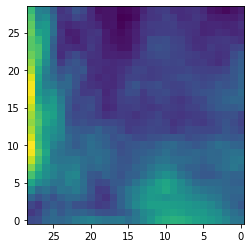

In [57]:
plt.imshow(xi_s_mu, origin='lower')
plt.gca().invert_xaxis()
